### 4 Modelling

### 1.1 Load libraries

In [13]:
pip install shap xgboost catboost

Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#machine learning
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier
import shap
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

### 4.1 Support functions

In [15]:
def confusion_matrix_plotter (y_test,y_pred):
  fig, ax = plt.subplots(figsize=(8,5)) 
  data = confusion_matrix(y_test, y_pred)
  df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
  ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
  ax.set_xlabel("Predicted")
  ax.set_ylabel ("Actual")
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  ax.set_yticklabels(ax.get_xticklabels(), rotation=0)

In [16]:
def feature_importances (model, title):
  features= X_train.columns
  importances = np.round(model.feature_importances_,3) 
  indices = np.argsort(importances)
  num_features = len(features)
  fig, ax = plt.subplots(figsize=(10,10)) 
  plt.barh(range(num_features), importances[indices[-num_features:]],  align='center', color =  '#66c2a5')
  plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
  plt.xlabel('Relative Importance')
  plt.title('Feature Importance'+ title)
plt.show()

### 4.2 Data insertion

In [17]:
training_data_value = pd.read_csv("../Data/Training_set_values.csv")
training_data_label = pd.read_csv("../Data/Training_set_labels.csv")
testing_data = pd.read_csv("../Data/Test_set_values.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

final_df = pd.read_csv('Values_Modify.csv')
final_df = final_df.drop('Unnamed: 0', axis=1)



### 4.3 Modelling

In [18]:
#define train and test 
train_set = final_df[final_df["id"].isin(training_data_value["id"])]
test_set =  final_df[final_df["id"].isin(testing_data["id"])]

In [19]:
#define X and y for training the model
X= train_set.drop(['id', 'status_group'], axis=1)
y = train_set['status_group']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42 , stratify=y)

In [20]:


label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
y = label_encoder.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])

### 4.4 Model detail

In [21]:
#define the models
models=[LogisticRegression(max_iter = 1000000,  random_state=42),
        KNeighborsClassifier(),
        DecisionTreeClassifier( random_state=42),
       RandomForestClassifier( random_state=42),
       XGBClassifier( random_state=42),
        BaggingClassifier( random_state=42), 
        AdaBoostClassifier( random_state=42),
        GradientBoostingClassifier( random_state=42),
       CatBoostClassifier( random_state=42)]

#create a list of model names
names =['Logistic Regression', 'KNN Classifier', 'Decision Tree Classifier', 'Random Forest Classifier',  'XGB Classifier', 'Bagging Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Catboost Classifier']

#create empty lists for the accuracy and standard deviation
accuracy=[]
std = []

#peform 10-fold cross validaton on each model and append the results to the list
for model in models:
  cv = KFold(n_splits=10, shuffle = True,  random_state=1)
  n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  mean_score = np.mean(n_scores)
  std_score = np.std(n_scores)
  accuracy.append(mean_score)
  std.append(std_score)

#create a dataframe of the model performances
d = {'Model':names,'Accuracy':accuracy, 'Std':std}   
score_df = pd.DataFrame(d)
score_df

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R

Learning rate set to 0.096929
Learning rate set to 0.096929
Learning rate set to 0.096929
Learning rate set to 0.096929
Learning rate set to 0.096929
Learning rate set to 0.096929
Learning rate set to 0.096929
Learning rate set to 0.096929
Learning rate set to 0.096929
Learning rate set to 0.096929
0:	learn: 1.0319618	total: 82.9ms	remaining: 1m 22s
0:	learn: 1.0322510	total: 85.5ms	remaining: 1m 25s
0:	learn: 1.0313098	total: 86.3ms	remaining: 1m 26s
0:	learn: 1.0318629	total: 87.1ms	remaining: 1m 26s
0:	learn: 1.0313605	total: 88.7ms	remaining: 1m 28s
0:	learn: 1.0313609	total: 87ms	remaining: 1m 26s
0:	learn: 1.0311545	total: 91.9ms	remaining: 1m 31s
0:	learn: 1.0313321	total: 94.3ms	remaining: 1m 34s
0:	learn: 1.0313394	total: 95.9ms	remaining: 1m 35s
0:	learn: 1.0317498	total: 100ms	remaining: 1m 40s
1:	learn: 0.9788670	total: 107ms	remaining: 53.5s
1:	learn: 0.9782986	total: 108ms	remaining: 54s
1:	learn: 0.9781242	total: 114ms	remaining: 56.8s
1:	learn: 0.9778485	total: 115ms	re

Model  Accuracy       Std
0           Logistic Regression  0.693771  0.003818
1                KNN Classifier  0.752088  0.005031
2      Decision Tree Classifier  0.758013  0.004854
3      Random Forest Classifier  0.784596  0.005818
4                XGB Classifier  0.788838  0.004387
5            Bagging Classifier  0.775572  0.004701
6           AdaBoost Classifier  0.718687  0.002830
7  Gradient Boosting Classifier  0.739141  0.004691
8           Catboost Classifier  0.787828  0.003776

### 4.5 Random forest

In [22]:

# X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42 , stratify=y)


param_grid = { 'n_estimators': [ 150, 175,  200, 225],
             'max_features':['log2', ],
             'max_depth' : [30 , 40, 50, 60, 70],      
             'min_samples_split':[6, 7, 8, 9, 10]}



#Create a based model
rf =     RandomForestClassifier( random_state=42, warm_start = True)

grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5,  verbose = 2,  scoring = 'accuracy')

#fitmodel
grid_search_rf .fit(X_train, y_train)

#print best parameters 
print('Best Score:', grid_search_rf .best_score_)
print('Parameters:', grid_search_rf .best_params_)
print('Best Model:', grid_search_rf .best_estimator_)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=30, max_features=log2, min_samples_split=6, n_estimators=150; total time=   2.8s
[CV] END max_depth=30, max_features=log2, min_samples_split=6, n_estimators=150; total time=   2.8s
[CV] END max_depth=30, max_features=log2, min_samples_split=6, n_estimators=150; total time=   2.7s
[CV] END max_depth=30, max_features=log2, min_samples_split=6, n_estimators=150; total time=   2.8s
[CV] END max_depth=30, max_features=log2, min_samples_split=6, n_estimators=150; total time=   2.8s
[CV] END max_depth=30, max_features=log2, min_samples_split=6, n_estimators=175; total time=   3.2s
[CV] END max_depth=30, max_features=log2, min_samples_split=6, n_estimators=175; total time=   3.2s
[CV] END max_depth=30, max_features=log2, min_samples_split=6, n_estimators=175; total time=   3.3s
[CV] END max_depth=30, max_features=log2, min_samples_split=6, n_estimators=175; total time=   3.3s
[CV] END max_depth=30, max_features=l

Accuracy score train: 0.885563973063973
Accuracy score test: 0.7917508417508418

                         precision    recall  f1-score   support

             functional       0.78      0.90      0.84      6452
functional needs repair       0.58      0.27      0.37       863
         non functional       0.83      0.74      0.78      4565

               accuracy                           0.79     11880
              macro avg       0.73      0.64      0.66     11880
           weighted avg       0.79      0.79      0.78     11880



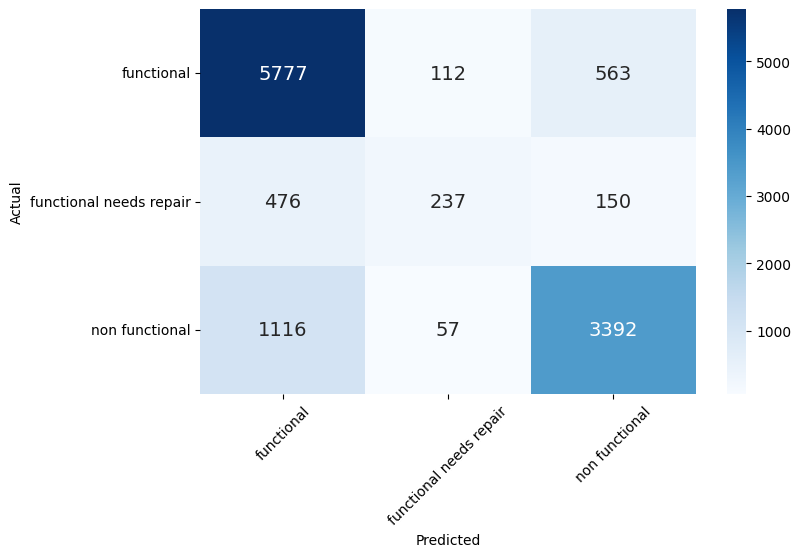

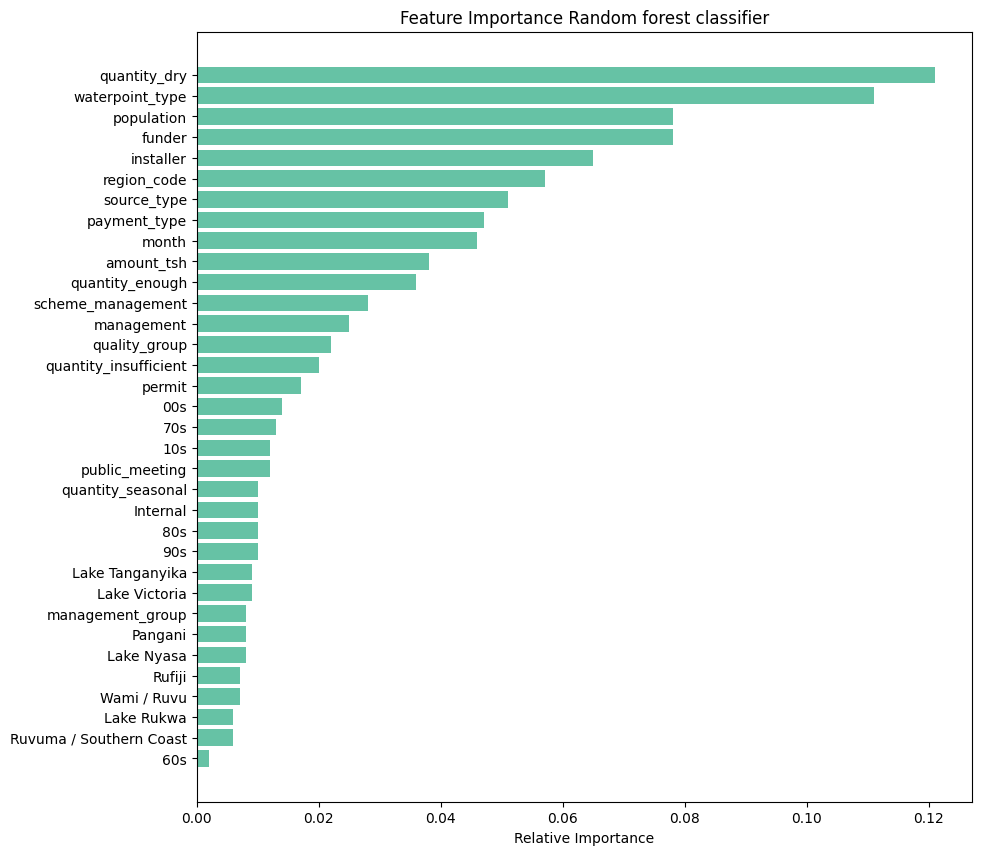

In [23]:
#score model
best_model = RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=7, n_estimators=225, random_state=42, warm_start=True)

#fit and predict
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)

#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print()

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)

feature_importances(best_model, " Random forest classifier")

### 4.6 Xgboost

In [24]:
# Create training and test sets: test size 0.2
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)


param_grid = { 'n_estimators': [ 200, ],
              'colsample_bytree' :[  0.3, ],
              'eta': [0.2,],
             'max_depth': [12]}


#Create a based model
xgb =     XGBClassifier( random_state=42)

grid_search_xgb = GridSearchCV(estimator = xgb, param_grid = param_grid, cv = 5,  verbose = 2,  scoring = 'accuracy')

#fitmodel
grid_search_xgb .fit(X_train, y_train,  eval_metric = 'mlogloss',)

#print best parameters 
print('Best Score:', grid_search_xgb .best_score_)
print('Parameters:', grid_search_xgb .best_params_)
print('Best Model:', grid_search_xgb .best_estimator_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END colsample_bytree=0.3, eta=0.2, max_depth=12, n_estimators=200; total time=   1.5s
[CV] END colsample_bytree=0.3, eta=0.2, max_depth=12, n_estimators=200; total time=   1.7s
[CV] END colsample_bytree=0.3, eta=0.2, max_depth=12, n_estimators=200; total time=   1.6s
[CV] END colsample_bytree=0.3, eta=0.2, max_depth=12, n_estimators=200; total time=   1.6s
[CV] END colsample_bytree=0.3, eta=0.2, max_depth=12, n_estimators=200; total time=   1.5s
Best Score: 0.7902567340067341
Parameters: {'colsample_bytree': 0.3, 'eta': 0.2, 'max_depth': 12, 'n_estimators': 200}
Best Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_

Accuracy score train: 0.9073232323232323
Accuracy score test: 0.7952861952861953

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      6452
           1       0.56      0.32      0.40       863
           2       0.83      0.75      0.79      4565

    accuracy                           0.80     11880
   macro avg       0.73      0.65      0.68     11880
weighted avg       0.79      0.80      0.79     11880



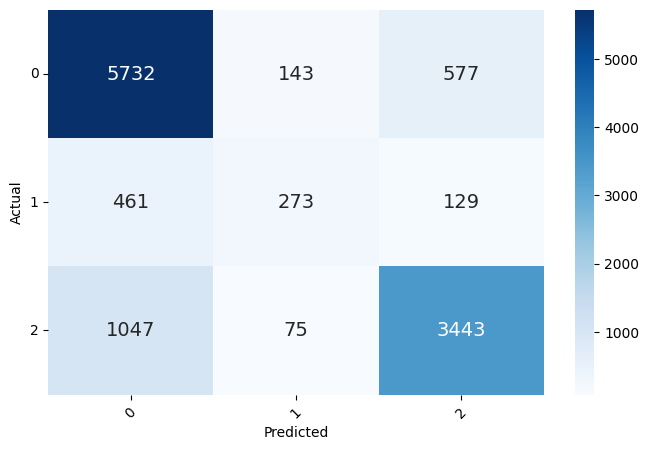

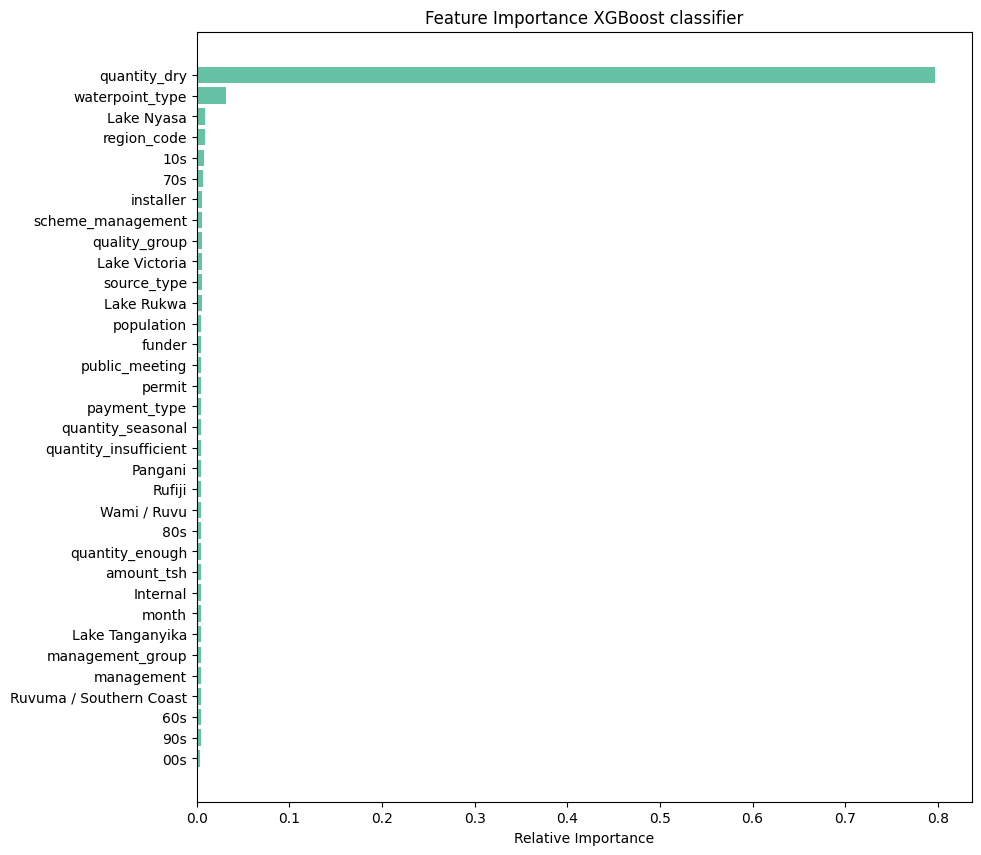

In [25]:
#score model
best_model = XGBClassifier( random_state=42, n_estimators = 200, colsample_bytree = 0.3, eta = 0.2, max_depth = 12 )
best_model .fit(X_train, y_train,  eval_metric = 'mlogloss',)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print()

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)

feature_importances(best_model, " XGBoost classifier")

### 4.7 Catboost

In [26]:
# Create training and test sets: test size 0.2
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42 , stratify=y)


param_grid = { 'max_depth': [ 7,8,9],
              'iterations': [1000, 750],
              'rsm' :[0.3, 0.2]}

#Create a based model
cat  =     CatBoostClassifier( random_state=42)

grid_search_cat = GridSearchCV(estimator = cat, param_grid = param_grid, cv = 5,  verbose = 2,  scoring = 'accuracy')

#fitmodel
grid_search_cat .fit(X_train, y_train)

#print best parameters 
print('Best Score:', grid_search_cat .best_score_)
print('Parameters:', grid_search_cat .best_params_)
print('Best Model:', grid_search_cat .best_estimator_)




Fitting 5 folds for each of 12 candidates, totalling 60 fits
Learning rate set to 0.095258
0:	learn: 1.0343041	total: 60.9ms	remaining: 1m
1:	learn: 0.9820113	total: 66.5ms	remaining: 33.2s
2:	learn: 0.9409497	total: 70.7ms	remaining: 23.5s
3:	learn: 0.9052084	total: 75.4ms	remaining: 18.8s
4:	learn: 0.8763650	total: 79.8ms	remaining: 15.9s
5:	learn: 0.8501925	total: 83.5ms	remaining: 13.8s
6:	learn: 0.8337360	total: 86.3ms	remaining: 12.2s
7:	learn: 0.8154657	total: 90.1ms	remaining: 11.2s
8:	learn: 0.7996336	total: 93.7ms	remaining: 10.3s
9:	learn: 0.7843991	total: 97.2ms	remaining: 9.62s
10:	learn: 0.7722878	total: 101ms	remaining: 9.1s
11:	learn: 0.7607206	total: 105ms	remaining: 8.65s
12:	learn: 0.7506652	total: 109ms	remaining: 8.28s
13:	learn: 0.7412768	total: 112ms	remaining: 7.91s
14:	learn: 0.7341276	total: 116ms	remaining: 7.61s
15:	learn: 0.7261707	total: 120ms	remaining: 7.38s
16:	learn: 0.7204807	total: 124ms	remaining: 7.19s
17:	learn: 0.7146094	total: 128ms	remaining: 7

In [27]:
#score model
best_model = CatBoostClassifier( random_state=42, rsm = 0.2, max_depth =9, iterations = 1000)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)


Learning rate set to 0.096348
0:	learn: 1.0312351	total: 7.97ms	remaining: 7.97s
1:	learn: 0.9778734	total: 13.9ms	remaining: 6.93s
2:	learn: 0.9329439	total: 19.1ms	remaining: 6.33s
3:	learn: 0.8961374	total: 25ms	remaining: 6.23s
4:	learn: 0.8656539	total: 30.5ms	remaining: 6.07s
5:	learn: 0.8390023	total: 35.9ms	remaining: 5.95s
6:	learn: 0.8154360	total: 42.2ms	remaining: 5.98s
7:	learn: 0.7963805	total: 47.2ms	remaining: 5.86s
8:	learn: 0.7795935	total: 52.7ms	remaining: 5.8s
9:	learn: 0.7648374	total: 57.9ms	remaining: 5.73s
10:	learn: 0.7520564	total: 62.8ms	remaining: 5.65s
11:	learn: 0.7412081	total: 68.4ms	remaining: 5.63s
12:	learn: 0.7294543	total: 74.9ms	remaining: 5.69s
13:	learn: 0.7202975	total: 79.7ms	remaining: 5.61s
14:	learn: 0.7125351	total: 85.2ms	remaining: 5.59s
15:	learn: 0.7047819	total: 91.1ms	remaining: 5.6s
16:	learn: 0.6986284	total: 97ms	remaining: 5.61s
17:	learn: 0.6928465	total: 102ms	remaining: 5.57s
18:	learn: 0.6866718	total: 107ms	remaining: 5.54s


Accuracy score train: 0.8680765993265993
Accuracy score test: 0.7911616161616162

              precision    recall  f1-score   support

           0       0.78      0.89      0.84      6452
           1       0.56      0.28      0.37       863
           2       0.83      0.74      0.78      4565

    accuracy                           0.79     11880
   macro avg       0.72      0.64      0.66     11880
weighted avg       0.78      0.79      0.78     11880



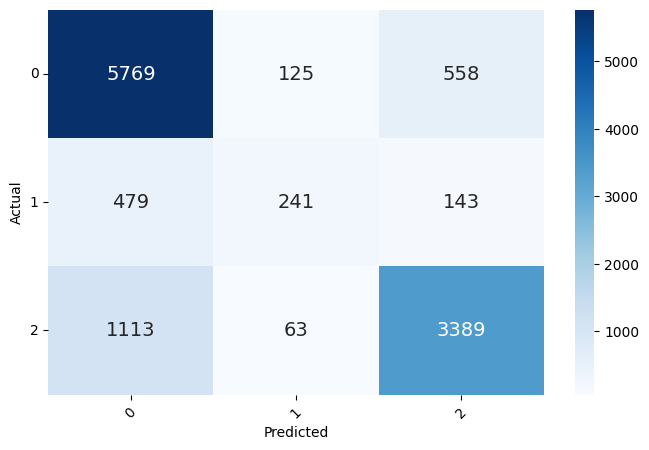

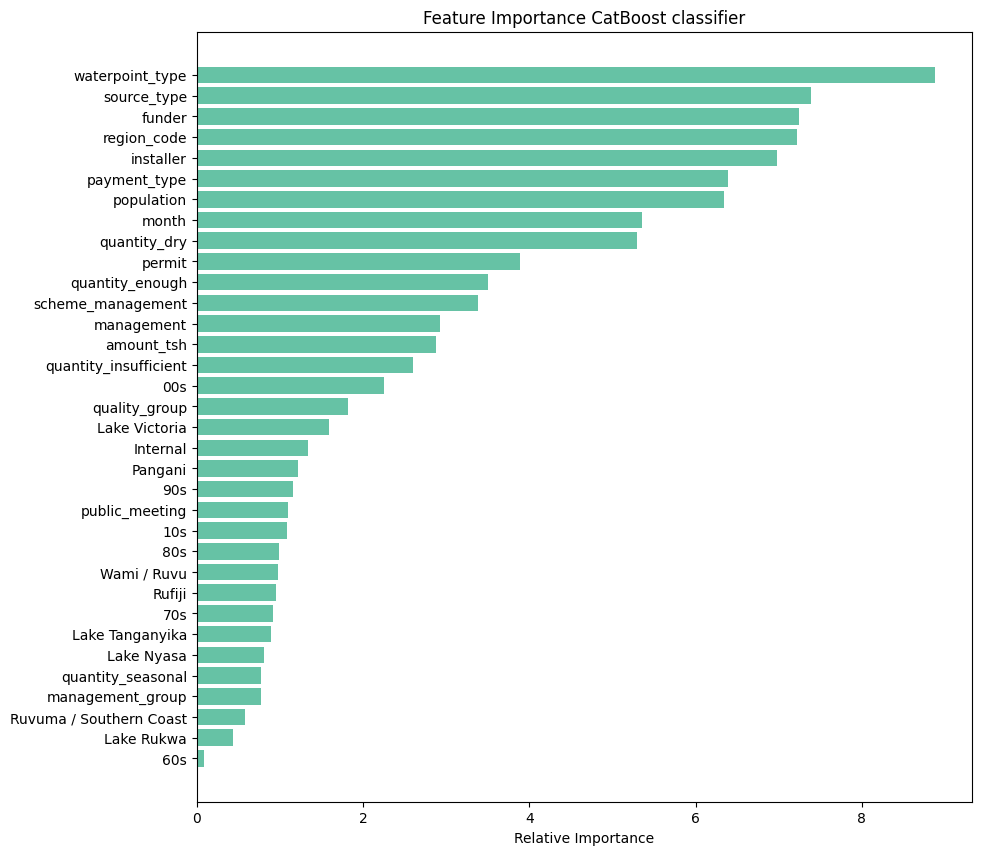

In [28]:


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print()

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)

feature_importances(best_model, " CatBoost classifier")

### 4.8 Bagging

In [29]:
# Create training and test sets: test size 0.2
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42)


param_grid = { 'n_estimators': [100, 200, 300, 400, 500, 700, 800, 900, 1000],
              'max_features': [0.2, 0.25, 0.3, 0.35, 0.4]}

    

#Create a based model
bag  =      BaggingClassifier( random_state=42, )

grid_search_bag = RandomizedSearchCV(estimator = bag, param_distributions = param_grid, cv =5, n_iter = 45,
                               verbose = 2, scoring = 'accuracy')

#fitmodel
grid_search_bag.fit(X_train, y_train )

#print best parameters 
print('Best Score:', grid_search_bag.best_score_)
print('Parameters:', grid_search_bag.best_params_)
print('Best Model:',grid_search_bag .best_estimator_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END .................max_features=0.2, n_estimators=100; total time=   1.1s
[CV] END .................max_features=0.2, n_estimators=100; total time=   1.1s
[CV] END .................max_features=0.2, n_estimators=100; total time=   1.1s
[CV] END .................max_features=0.2, n_estimators=100; total time=   1.1s
[CV] END .................max_features=0.2, n_estimators=100; total time=   1.1s
[CV] END .................max_features=0.2, n_estimators=200; total time=   2.1s
[CV] END .................max_features=0.2, n_estimators=200; total time=   2.0s
[CV] END .................max_features=0.2, n_estimators=200; total time=   2.1s
[CV] END .................max_features=0.2, n_estimators=200; total time=   2.1s
[CV] END .................max_features=0.2, n_estimators=200; total time=   2.1s
[CV] END .................max_features=0.2, n_estimators=300; total time=   3.1s
[CV] END .................max_features=0.2, n_e

Accuracy score train: 0.8772727272727273
Accuracy score test: 0.7895622895622896

              precision    recall  f1-score   support

           0       0.77      0.91      0.84      6457
           1       0.68      0.16      0.26       851
           2       0.84      0.73      0.78      4572

    accuracy                           0.79     11880
   macro avg       0.76      0.60      0.62     11880
weighted avg       0.79      0.79      0.77     11880



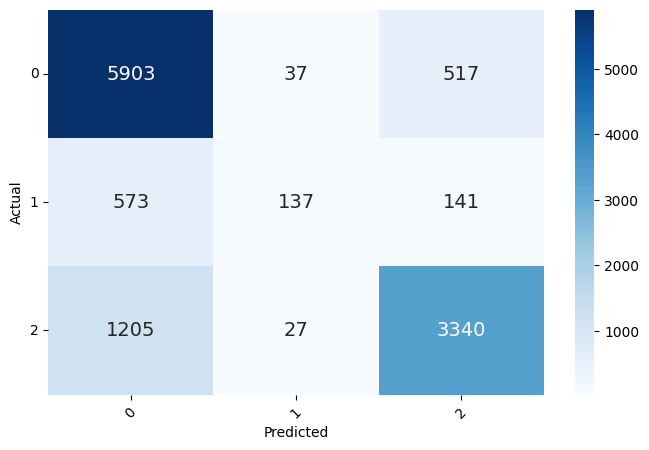

In [30]:
#get scores
best_model = BaggingClassifier( random_state=42, n_estimators = 1000, max_features = 0.4 )
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, y_pred)))
print()

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix_plotter(y_test, y_pred)


### 4.9 Mixed vote

In [31]:
rf = RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=7, n_estimators=225, random_state=42, warm_start=True)
xgb = XGBClassifier(max_depth =12, n_estimators= 200, colsample_bytree = 0.3, eta = 0.2, random_state = 42) 
cat = CatBoostClassifier(max_depth = 9, rsm = 0.2, iterations = 1000, random_state = 42)
bag = BaggingClassifier(max_features=0.4, n_estimators=1000, random_state=42) 


Learning rate set to 0.096348
0:	learn: 1.0312351	total: 7.3ms	remaining: 7.3s
1:	learn: 0.9778734	total: 15.6ms	remaining: 7.8s
2:	learn: 0.9329439	total: 21.6ms	remaining: 7.19s
3:	learn: 0.8961374	total: 29.7ms	remaining: 7.39s
4:	learn: 0.8656539	total: 36.9ms	remaining: 7.35s
5:	learn: 0.8390023	total: 46ms	remaining: 7.62s
6:	learn: 0.8154360	total: 55.1ms	remaining: 7.81s
7:	learn: 0.7963805	total: 63.6ms	remaining: 7.88s
8:	learn: 0.7795935	total: 71.8ms	remaining: 7.91s
9:	learn: 0.7648374	total: 78.3ms	remaining: 7.75s
10:	learn: 0.7520564	total: 86ms	remaining: 7.73s
11:	learn: 0.7412081	total: 92.8ms	remaining: 7.64s
12:	learn: 0.7294543	total: 101ms	remaining: 7.67s
13:	learn: 0.7202975	total: 108ms	remaining: 7.6s
14:	learn: 0.7125351	total: 116ms	remaining: 7.62s
15:	learn: 0.7047819	total: 124ms	remaining: 7.61s
16:	learn: 0.6986284	total: 132ms	remaining: 7.62s
17:	learn: 0.6928465	total: 140ms	remaining: 7.64s
18:	learn: 0.6866718	total: 149ms	remaining: 7.69s
19:	lea

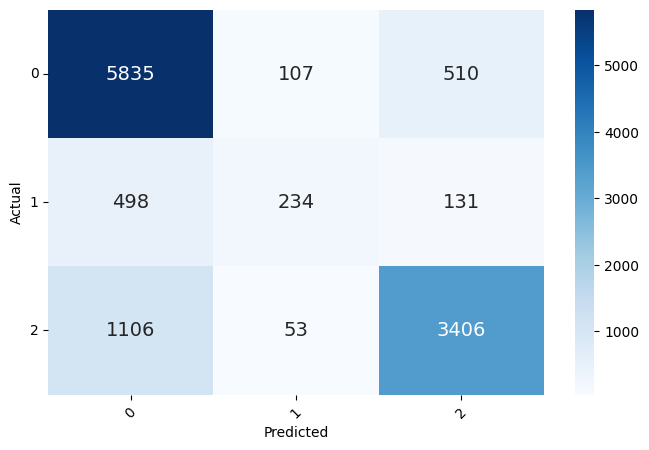

In [32]:
# Create training and test sets: test size 0.2
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)


vc = VotingClassifier([('rf', rf), ('xgb', xgb),('cat', cat), ('bag', bag)], voting = 'soft')
                       

#fit and predict
vc.fit(X_train , y_train)
pred= vc .predict(X_test)
pred_train = vc .predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, pred)))

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

### 4.10  Xgboost vote

In [33]:
xgb1 = XGBClassifier(max_depth =12, n_estimators= 200, colsample_bytree = 0.3, eta = 0.2, random_state = 42)
xgb2 = XGBClassifier(max_depth =12, n_estimators= 200, colsample_bytree = 0.3, eta = 0.2, random_state = 2) 
xgb3 = XGBClassifier(max_depth =12, n_estimators= 200, colsample_bytree = 0.3, eta = 0.2, random_state = 142) 
xgb4 = XGBClassifier(max_depth =12, n_estimators= 200, colsample_bytree = 0.3, eta = 0.2, random_state = 33 )
xgb5 = XGBClassifier(max_depth =12, n_estimators= 200, colsample_bytree = 0.3, eta = 0.2, random_state = 678)

Accuracy score train: 0.9082491582491582
Accuracy score test: 0.7946127946127947
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      6452
           1       0.55      0.30      0.39       863
           2       0.83      0.75      0.79      4565

    accuracy                           0.79     11880
   macro avg       0.72      0.65      0.67     11880
weighted avg       0.79      0.79      0.79     11880



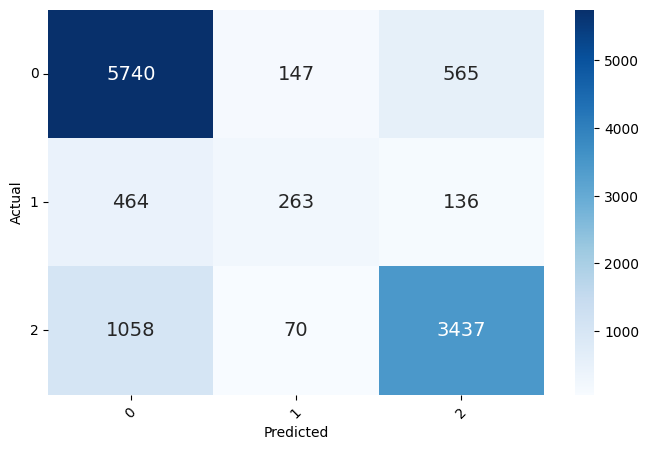

In [34]:
# Create training and test sets: test size 0.2
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)


vc = VotingClassifier([('xgb1', xgb1), ('xgb2', xgb2), ('xgb3', xgb3), ('xgb4', xgb4), ('xgb5', xgb5)], voting = 'soft')
                       

#fit and predict
vc.fit(X_train , y_train)
pred= vc .predict(X_test)
pred_train = vc .predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, pred)))

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

### 4.11 Stacking

Learning rate set to 0.096348
0:	learn: 1.0312351	total: 7.08ms	remaining: 7.07s
1:	learn: 0.9778734	total: 14.4ms	remaining: 7.18s
2:	learn: 0.9329439	total: 20.7ms	remaining: 6.88s
3:	learn: 0.8961374	total: 28ms	remaining: 6.96s
4:	learn: 0.8656539	total: 34.3ms	remaining: 6.83s
5:	learn: 0.8390023	total: 41.3ms	remaining: 6.85s
6:	learn: 0.8154360	total: 48.9ms	remaining: 6.94s
7:	learn: 0.7963805	total: 55.6ms	remaining: 6.89s
8:	learn: 0.7795935	total: 63.3ms	remaining: 6.97s
9:	learn: 0.7648374	total: 69.5ms	remaining: 6.88s
10:	learn: 0.7520564	total: 75.4ms	remaining: 6.78s
11:	learn: 0.7412081	total: 81.8ms	remaining: 6.74s
12:	learn: 0.7294543	total: 89.7ms	remaining: 6.81s
13:	learn: 0.7202975	total: 96.5ms	remaining: 6.79s
14:	learn: 0.7125351	total: 103ms	remaining: 6.77s
15:	learn: 0.7047819	total: 110ms	remaining: 6.76s
16:	learn: 0.6986284	total: 117ms	remaining: 6.79s
17:	learn: 0.6928465	total: 124ms	remaining: 6.74s
18:	learn: 0.6866718	total: 130ms	remaining: 6.74s

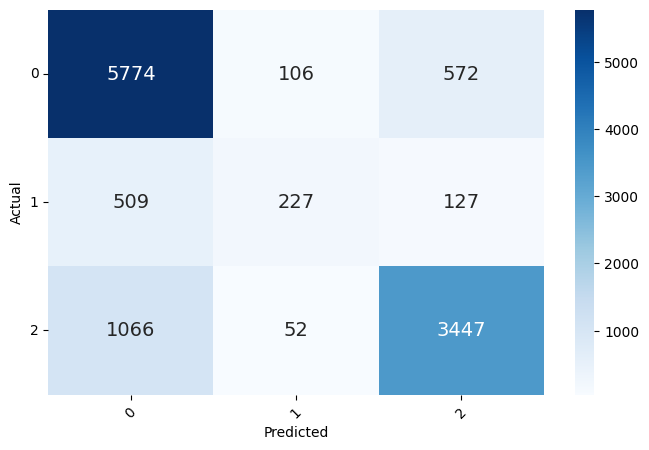

In [35]:
# Create training and test sets: test size 0.2
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)


stack = StackingClassifier([('rf', rf), 
                              ('xgb', xgb),
                              ('cat', cat),
                           ('bag', bag)], final_estimator=LogisticRegression())
                       

#fit and predict
stack.fit(X_train , y_train)
pred= stack.predict(X_test)
pred_train = stack.predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, pred)))


#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

### 4.11 Weighted vote

Learning rate set to 0.096348
0:	learn: 1.0312351	total: 7.81ms	remaining: 7.8s
1:	learn: 0.9778734	total: 15.6ms	remaining: 7.77s
2:	learn: 0.9329439	total: 25.9ms	remaining: 8.62s
3:	learn: 0.8961374	total: 34.6ms	remaining: 8.61s
4:	learn: 0.8656539	total: 41.4ms	remaining: 8.23s
5:	learn: 0.8390023	total: 48.7ms	remaining: 8.07s
6:	learn: 0.8154360	total: 56.3ms	remaining: 7.99s
7:	learn: 0.7963805	total: 63.7ms	remaining: 7.89s
8:	learn: 0.7795935	total: 71ms	remaining: 7.82s
9:	learn: 0.7648374	total: 77.3ms	remaining: 7.66s
10:	learn: 0.7520564	total: 83.4ms	remaining: 7.5s
11:	learn: 0.7412081	total: 90.2ms	remaining: 7.43s
12:	learn: 0.7294543	total: 98.4ms	remaining: 7.47s
13:	learn: 0.7202975	total: 105ms	remaining: 7.37s
14:	learn: 0.7125351	total: 111ms	remaining: 7.32s
15:	learn: 0.7047819	total: 119ms	remaining: 7.3s
16:	learn: 0.6986284	total: 127ms	remaining: 7.35s
17:	learn: 0.6928465	total: 133ms	remaining: 7.26s
18:	learn: 0.6866718	total: 140ms	remaining: 7.21s
19:

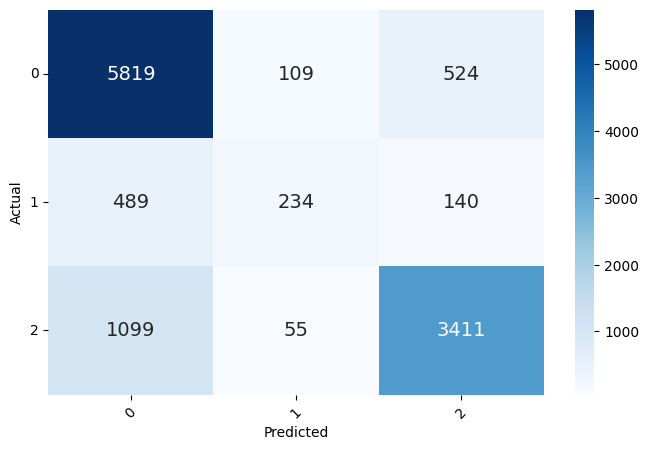

In [36]:
# Create training and test sets: test size 0.2
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)


vc = VotingClassifier([('rf', rf), ('xgb', xgb),('cat', cat), ('bag', bag)], voting = 'soft', weights = [0.85, 1, 0.85, 0.75])
                       

#fit and predict
vc.fit(X_train , y_train)
pred= vc .predict(X_test)
pred_train = vc .predict(X_train)


#print best model scores on test data
print("Accuracy score train: {}".format(accuracy_score(y_train ,pred_train)))
print("Accuracy score test: {}".format(accuracy_score(y_test, pred)))

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, pred))

#heatmap
fig, ax = plt.subplots(figsize=(8,5)) 
data = confusion_matrix(y_test, pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
ax = sns.heatmap(df_cm, cmap='Blues', fmt='g' ,annot=True,annot_kws={"size": 14})
ax.set_xlabel("Predicted")
ax.set_ylabel ("Actual")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

In [37]:
#fit on foll training set
vc.fit(X , y)

#predict
submission = test_set.drop(['id', 'status_group'], axis=1)
submission['status_group'] = vc.predict(submission)

#bring the id column back
submission['id'] = test_set['id']

#create df for submission and save
best_submission = submission[['id', 'status_group']]
best_submission.head()

Learning rate set to 0.097451
0:	learn: 1.0299642	total: 8.86ms	remaining: 8.85s
1:	learn: 0.9760691	total: 17.2ms	remaining: 8.59s
2:	learn: 0.9309009	total: 24.1ms	remaining: 8.02s
3:	learn: 0.8938618	total: 32.9ms	remaining: 8.19s
4:	learn: 0.8633594	total: 40.3ms	remaining: 8.02s
5:	learn: 0.8359879	total: 47.4ms	remaining: 7.86s
6:	learn: 0.8122265	total: 56.7ms	remaining: 8.04s
7:	learn: 0.7923700	total: 64.9ms	remaining: 8.05s
8:	learn: 0.7752333	total: 73ms	remaining: 8.04s
9:	learn: 0.7604386	total: 81.6ms	remaining: 8.08s
10:	learn: 0.7474783	total: 88.8ms	remaining: 7.98s
11:	learn: 0.7356337	total: 96.8ms	remaining: 7.96s
12:	learn: 0.7239203	total: 105ms	remaining: 7.99s
13:	learn: 0.7150375	total: 114ms	remaining: 8.01s
14:	learn: 0.7057409	total: 122ms	remaining: 8.02s
15:	learn: 0.6981257	total: 132ms	remaining: 8.09s
16:	learn: 0.6923109	total: 141ms	remaining: 8.16s
17:	learn: 0.6861885	total: 148ms	remaining: 8.07s
18:	learn: 0.6808007	total: 156ms	remaining: 8.03s
1

id  status_group
0  50785             0
1  51630             0
2  17168             0
3  45559             2
4  49871             0

In [38]:
best_submission.head()

id  status_group
0  50785             0
1  51630             0
2  17168             0
3  45559             2
4  49871             0

# 3 Result overview